# Evaluation of trained models

In [2]:
import pandas as pd
df_summary = pd.read_csv("../summary.csv")

In [3]:
df_summary

,Unnamed: 0,model,data_set,qrels,MRR@10,Recall@10,QueriesWithNoRelevant@10,QueriesWithRelevant@10,AverageRankGoldLabel@10,MedianRankGoldLabel@10,...,QueriesWithRelevant@1000,AverageRankGoldLabel@1000,MedianRankGoldLabel@1000,nDCG@3,nDCG@5,nDCG@10,nDCG@20,nDCG@1000,QueriesRanked,MAP@1000
0,0,knrm,ms marco,./data/Part-2/msmarco_qrels.txt,0.201150,0.423833,1140,860,3.836047,3.0,...,1212,9.155116,5.0,0.183366,0.215551,0.251906,0.273982,0.292730,2000,0.207001
1,1,tk,ms marco,./data/Part-2/msmarco_qrels.txt,0.201150,0.423833,1140,860,3.836047,3.0,...,1212,9.155116,5.0,0.183366,0.215551,0.251906,0.273982,0.292730,2000,0.207001
2,2,knrm,fira 22,./data/Part-1/fira-22.baseline-qrels.tsv,0.959610,0.938950,116,4059,1.096083,1.0,...,4060,1.099261,1.0,0.870208,0.873693,0.897905,0.919795,0.919795,4060,0.941503
3,3,tk,fira 22,./data/Part-1/fira-22.baseline-qrels.tsv,0.959610,0.938950,116,4059,1.096083,1.0,...,4060,1.099261,1.0,0.870208,0.873693,0.897905,0.919795,0.919795,4060,0.941503
4,4,knrm,fira 22 (avg log qrels),./data/output_part1_data/weighted_avg_log.tsv,0.965112,0.939853,80,4095,1.082540,1.0,...,4096,1.084961,1.0,0.872698,0.881714,0.903778,0.924670,0.924670,4096,0.948720
5,5,tk,fira 22 (avg log qrels),./data/output_part1_data/weighted_avg_log.tsv,0.965112,0.939853,80,4095,1.082540,1.0,...,4096,1.084961,1.0,0.872698,0.881714,0.903778,0.924670,0.924670,4096,0.948720
6,6,knrm,fira 22 (avg minmax qrels),./data/output_part1_data/weighted_avg_minmax.tsv,0.960354,0.939828,77,4098,1.091996,1.0,...,4100,1.097073,1.0,0.863735,0.871603,0.896400,0.918208,0.918208,4100,0.942456
7,7,tk,fira 22 (avg minmax qrels),./data/output_part1_data/weighted_avg_minmax.tsv,0.960354,0.939828,77,4098,1.091996,1.0,...,4100,1.097073,1.0,0.863735,0.871603,0.896400,0.918208,0.918208,4100,0.942456


Text(0.5, 1.0, 'Performance measure across model-dataset-combinations')

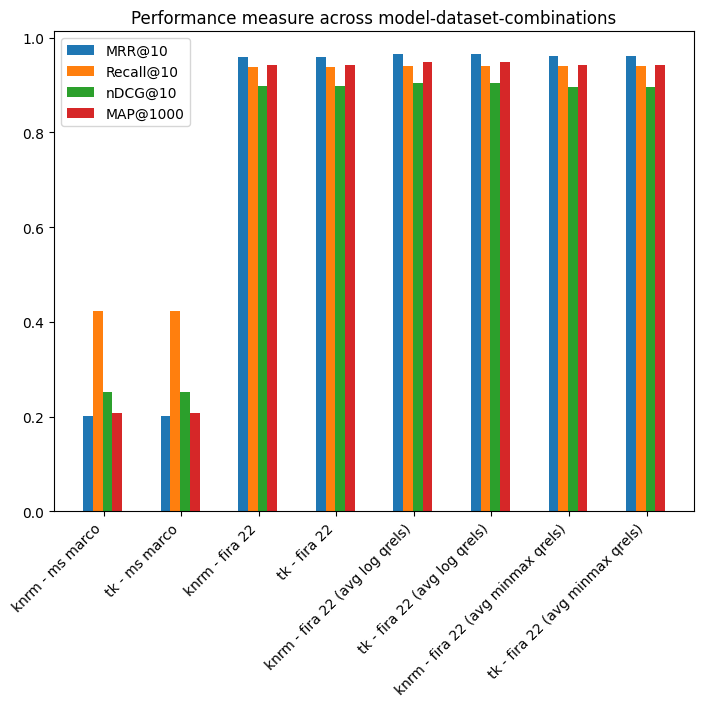

In [12]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib as mpl

X = np.arange(df_summary.shape[0])
measures = ["MRR@10", "Recall@10", "nDCG@10", "MAP@1000"]
colors = mpl.colormaps["tab10"].colors
bar_distance = 1 / df_summary.shape[0]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for idx, measure in enumerate(measures):
    b = ax.bar(X + idx * bar_distance, df_summary[measure], color = colors[idx], width = bar_distance)
    b.set_label(measure)

ax.legend()

ax.set_xticks(
    X + 0.2, 
    labels = df_summary.apply(lambda row: f"{row['model']} - {row['data_set']}", axis=1),
    rotation=45, ha = "right")

ax.set_title("Performance measure across model-dataset-combinations")

((0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254))

In [44]:
bar_distance * (len(measure) / 2)

0.8

In [35]:
df_summary.apply(lambda x: print(x), axis = 1)

Unnamed: 0                                                  0
model                                                    knrm
data_set                                             ms marco
qrels                         ./data/Part-2/msmarco_qrels.txt
MRR@10                                                0.20115
Recall@10                                            0.423833
QueriesWithNoRelevant@10                                 1140
QueriesWithRelevant@10                                    860
AverageRankGoldLabel@10                              3.836047
MedianRankGoldLabel@10                                    3.0
MRR@20                                               0.207185
Recall@20                                            0.509708
QueriesWithNoRelevant@20                                  969
QueriesWithRelevant@20                                   1031
AverageRankGoldLabel@20                              5.628516
MedianRankGoldLabel@20                                    4.0
MRR@1000

0    None
1    None
2    None
3    None
dtype: object